# Week2 事前課題
## 事前課題４　ダーツ投げ問題
###【問題１】ダーツの的を選ぶ

In [7]:
#投げる対象のダーツの的をランダムに選ぶ
import numpy as np

target = list(range(1, 7))

np.random.choice(target)

2

###【問題２】ダーツを投げて、刺さった場所を記録する

In [0]:
#x座標、y座標のそれぞれの値を取得する

val_x = np.random.normal(np.random.choice(target), 1, 10)
val_y = np.random.normal(0, 1, 10)


###【問題３】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する
ダーツを1000回投げて、全てのダーツの刺さった位置をディクショナリに格納する。

各的ごとにkeyを作成し、値に配列を作成して順次追加。

データの格納について、下記は条件分岐を使用しているが、後の関数作成時にはより一般化している。

In [0]:
#ndarrayリストを格納する辞書を作成
target_dict = dict.fromkeys(["1", "2", "3", "4", "5", "6",], np.empty((0, 2)))

#for文を回して値を格納
for i in range(1000):
  val_x = np.random.normal(np.random.choice(target), 0.15, 1)
  val_y = np.random.normal(0, 0.15, 1)
  val = np.append(val_x, val_y).reshape(1, 2)

  if val_x < 1.5:
    target_dict["1"] = np.vstack((target_dict["1"], val))
  elif 1.5 <= val_x < 2.5:
    target_dict["2"] = np.vstack((target_dict["2"], val))
  elif 2.5 <= val_x < 3.5:
    target_dict["3"] = np.vstack((target_dict["3"], val))
  elif 3.5 <= val_x < 4.5:
    target_dict["4"] = np.vstack((target_dict["4"], val))
  elif 4.5 <= val_x < 5.5:
    target_dict["5"] = np.vstack((target_dict["5"], val))
  elif 5.5 <= val_x:
    target_dict["6"] = np.vstack((target_dict["6"], val))


###【問題４】ダーツのまとと刺さった位置を描画する

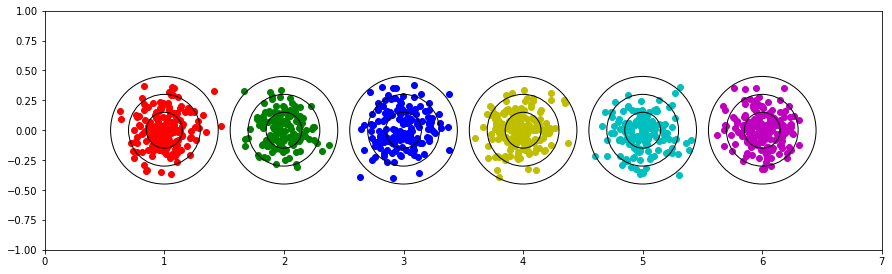

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline


fig = plt.figure(figsize=(15,10))
ax = plt.axes()

#的の描画
for i in range(1, 7):
  c_center = patches.Circle(xy=(i, 0), radius=0.15, fill=False, ec='k')
  c_mid = patches.Circle(xy=(i, 0), radius=0.3, fill=False, ec='k')
  c_out = patches.Circle(xy=(i, 0), radius=0.45, fill=False, ec='k')
  ax.add_patch(c_center)
  ax.add_patch(c_mid)
  ax.add_patch(c_out)

#矢の描画
plt.scatter(target_dict["1"][:, 0], target_dict["1"][:, 1], c='r')
plt.scatter(target_dict["2"][:, 0], target_dict["2"][:, 1], c='g')
plt.scatter(target_dict["3"][:, 0], target_dict["3"][:, 1], c='b')
plt.scatter(target_dict["4"][:, 0], target_dict["4"][:, 1], c='y')
plt.scatter(target_dict["5"][:, 0], target_dict["5"][:, 1], c='c')
plt.scatter(target_dict["6"][:, 0], target_dict["6"][:, 1], c='m')

#図の大きさの調整
plt.axis([0, 7, -1, 1])
ax.set_aspect('equal')

plt.show()


###【問題５】関数化
ダーツを投げる数、ダーツの的の数を変数とした関数の作成。


おまけで、上手い下手の変数（分散）も入力できるようにしてみる。

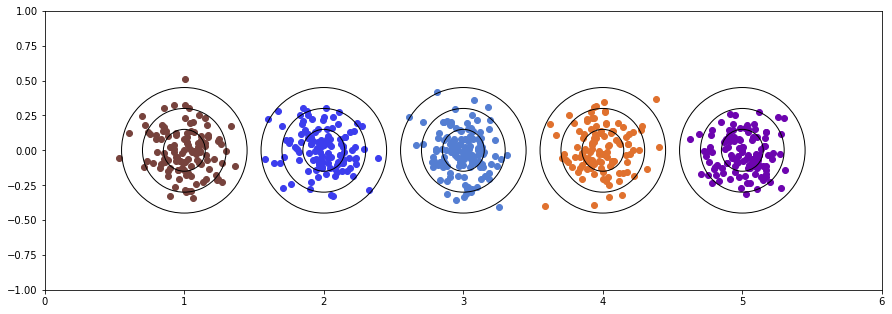

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from decimal import Decimal, ROUND_HALF_UP
%matplotlib inline

#ダーツ投げ関数の作成

def darts(darts_num, target_num, skill=0.15):
  #的の作成
  target = list(range(1, target_num + 1))
  target_str = [str(n) for n in target]  #key用ラベル

  #ndarrayリストを格納する辞書を作成
  target_dict = dict.fromkeys(target_str, np.empty((0, 2)))

  #for文を回してリストを作成
  for i in range(darts_num):
    val_x = np.random.normal(np.random.choice(target), skill, 1)
    val_y = np.random.normal(0, skill, 1)
    val = np.append(val_x, val_y).reshape(1, 2)

    #xの値を四捨五入して辞書ラベルを取得
    label = int(Decimal(val_x[0]).quantize(Decimal('0'), rounding=ROUND_HALF_UP))
    label_str = str(label)

    #辞書に追加
    target_dict[label_str] = np.vstack((target_dict[label_str], val))

  ###図表プロット
  fig = plt.figure(figsize=(15,10))
  ax = plt.axes()

  #的の描画
  for i in range(1, target_num + 1):
    c_center = patches.Circle(xy=(i, 0), radius=0.15, fill=False, ec='k')
    c_mid = patches.Circle(xy=(i, 0), radius=0.3, fill=False, ec='k')
    c_out = patches.Circle(xy=(i, 0), radius=0.45, fill=False, ec='k')
    ax.add_patch(c_center)
    ax.add_patch(c_mid)
    ax.add_patch(c_out)
  
  #色を変えて矢を描画
  for j in range(1, target_num + 1):
    color_list = [np.random.rand(), np.random.rand(), np.random.rand()]
    plt.scatter(target_dict[str(j)][:, 0], target_dict[str(j)][:, 1], color=color_list)

  #図の大きさの調整
  plt.axis([0, target_num + 1, -1, 1])
  ax.set_aspect('equal')

  plt.show()


darts(600, 5, 0.15)